# Least squares
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_04a_curve_fitting/least_squares.ipynb)
## Linear LS
Let's generate some noisy data


In [1]:
import numpy as np
import matplotlib.pyplot as plt

figsize = (10, 10)

np.random.seed(123)



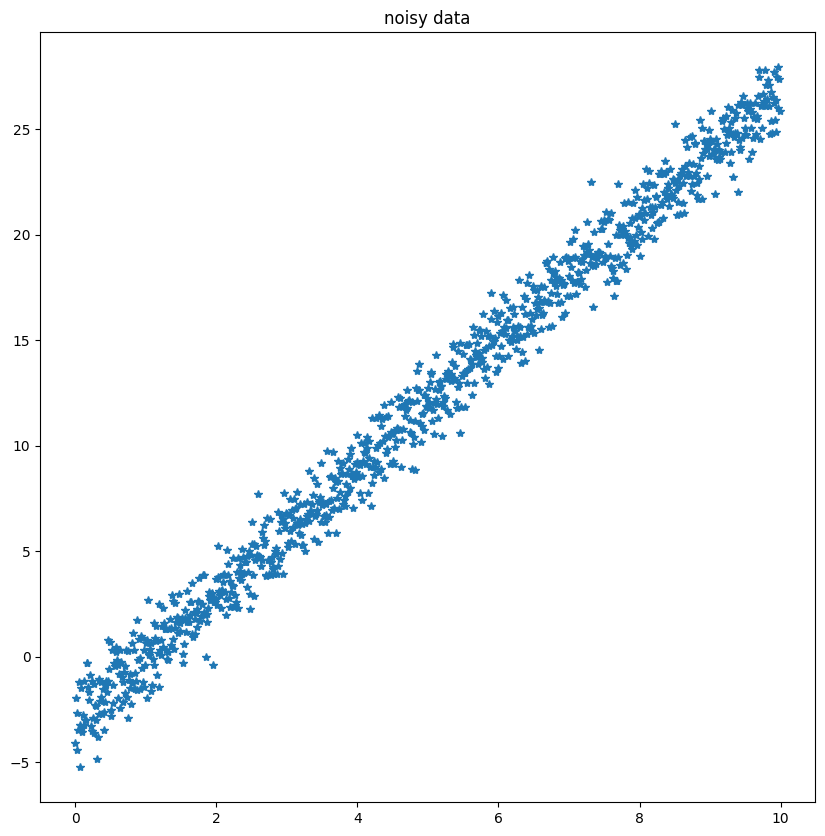

In [2]:
x_max = 10
x_step = 0.01
x = np.arange(0, x_max, x_step)
y = 3 * x - 3

# add noise to data
std = 1
y = y + np.random.normal(scale=std, size=x.shape)

plt.figure(figsize=figsize)
plt.plot(x, y, "*")
plt.title("noisy data")
plt.show()



### calc LS matrices and result:
$$ Xb = y $$


In [3]:
x_vec = x.reshape(-1, 1)
X = np.concatenate((x_vec, np.ones(x_vec.shape)), axis=1)
print(X.shape)
y_vec = y.reshape(-1, 1)



(1000, 2)


[[ 2.98942061]
 [-2.98672009]]


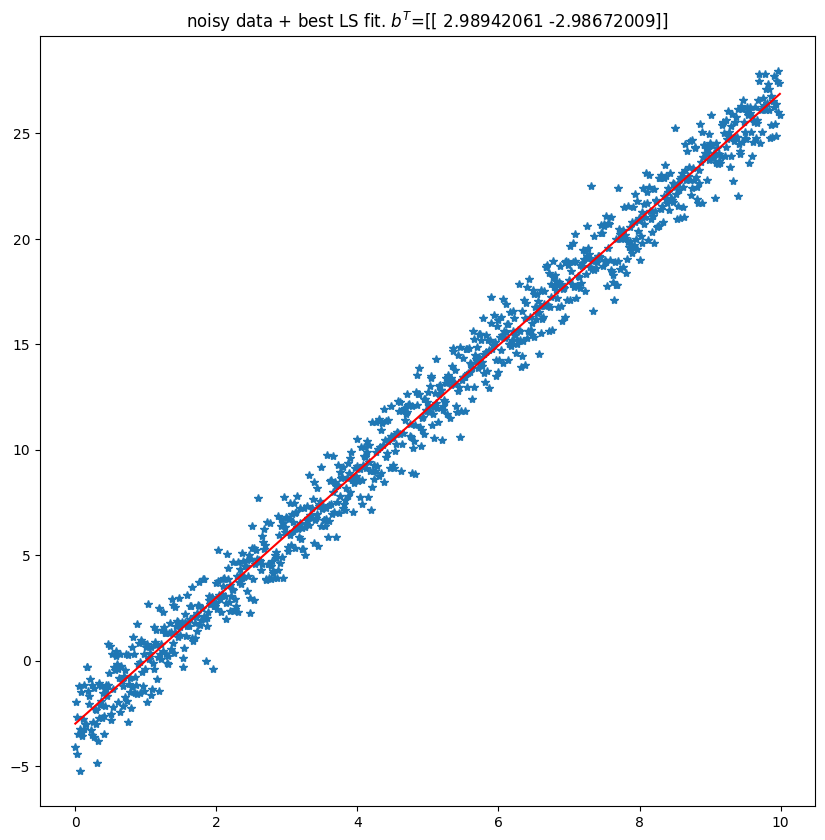

In [4]:
b = np.linalg.inv(X.T @ X) @ X.T @ y_vec
print(b)

# plot fit results
plt.figure(figsize=figsize)
plt.plot(x, y, "*")
plt.plot(x, b[0] * x + b[1], "r")
plt.title("noisy data + best LS fit. $b^T$=" + str(b.T))
plt.show()



## Comparison to np.linalg.lstsq


In [5]:
b_np = np.linalg.lstsq(X, y_vec, rcond=None)[0]
mse = np.mean((b - b_np) ** 2)
print(mse)


1.5777218104420236e-30


## vertical dataset
As mentioned in the lecture, LS is not goog at fitting vertical dataset.
Let's generate data:


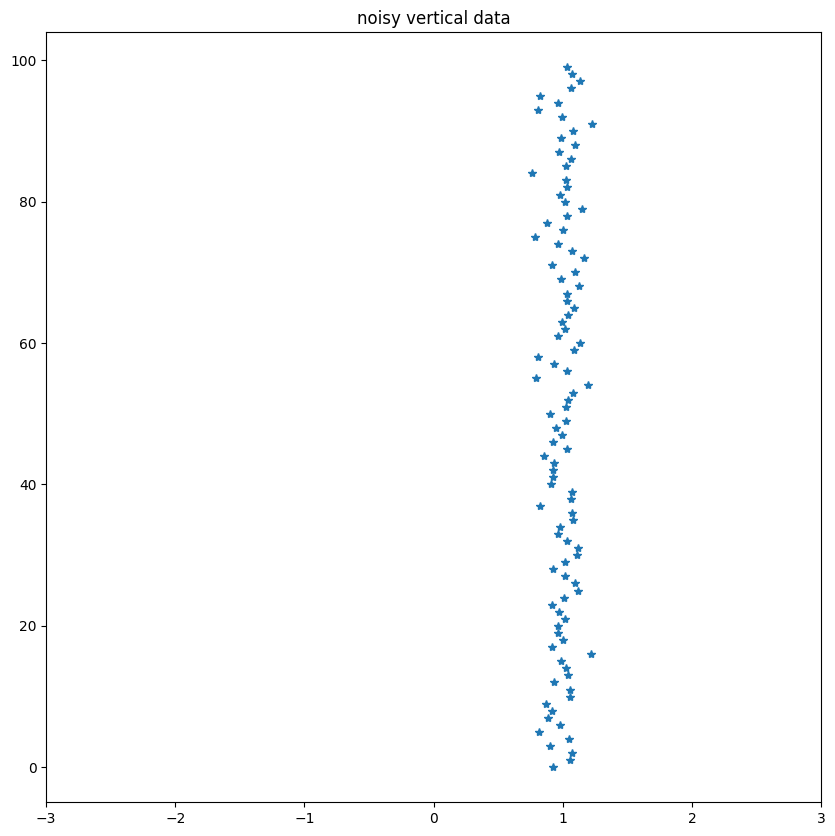

In [6]:
data_sz = 100
x = np.ones(data_sz)
y = np.arange(data_sz)

# add noise to data
std = 0.1
x = x + np.random.normal(scale=std, size=x.shape)

plt.figure(figsize=figsize)
plt.plot(x, y, "*")
axes = plt.gca()
axes.set_xlim([-3, 3])
plt.title("noisy vertical data")
plt.show()



Calc LS matrices and result


In [7]:
x_vec = x.reshape(-1, 1)
X = np.concatenate((x_vec, np.ones(x_vec.shape)), axis=1)
y_vec = y.reshape(-1, 1)



[[29.75660996]
 [19.74053351]]


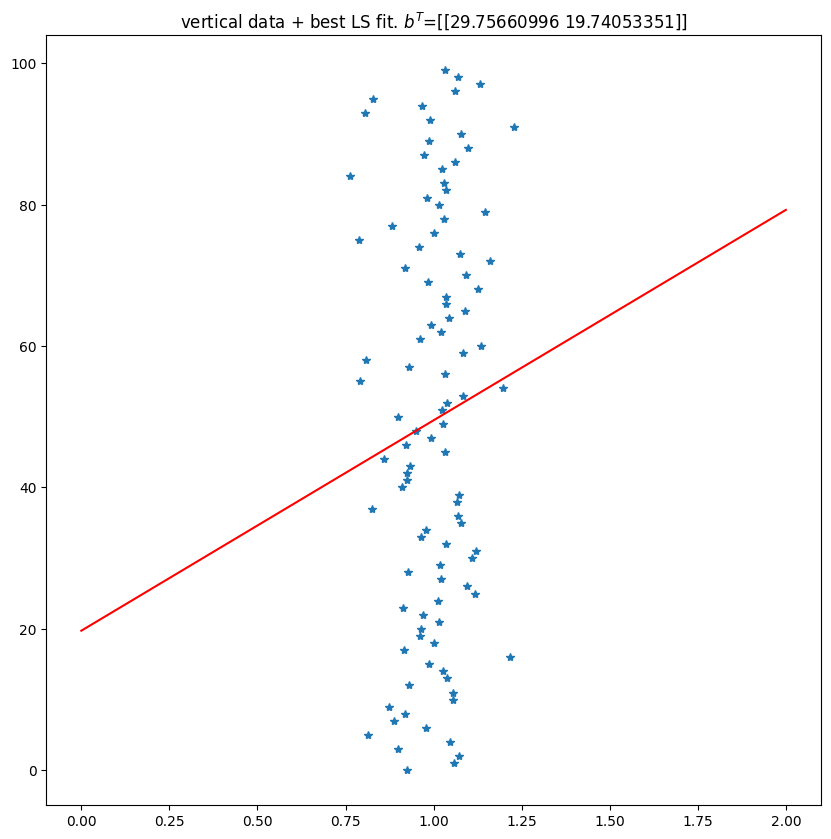

In [8]:
b = np.linalg.inv(X.T @ X) @ X.T @ y_vec
print(b)

# plot fit results
plt.figure(figsize=figsize)
plt.plot(x, y, "*")
x_axis = np.arange(3)
plt.plot(x_axis, b[0] * x_axis + b[1], "r")
plt.title("vertical data + best LS fit. $b^T$=" + str(b.T))
plt.show()




## TLS
Same vertical data, now with total least squares


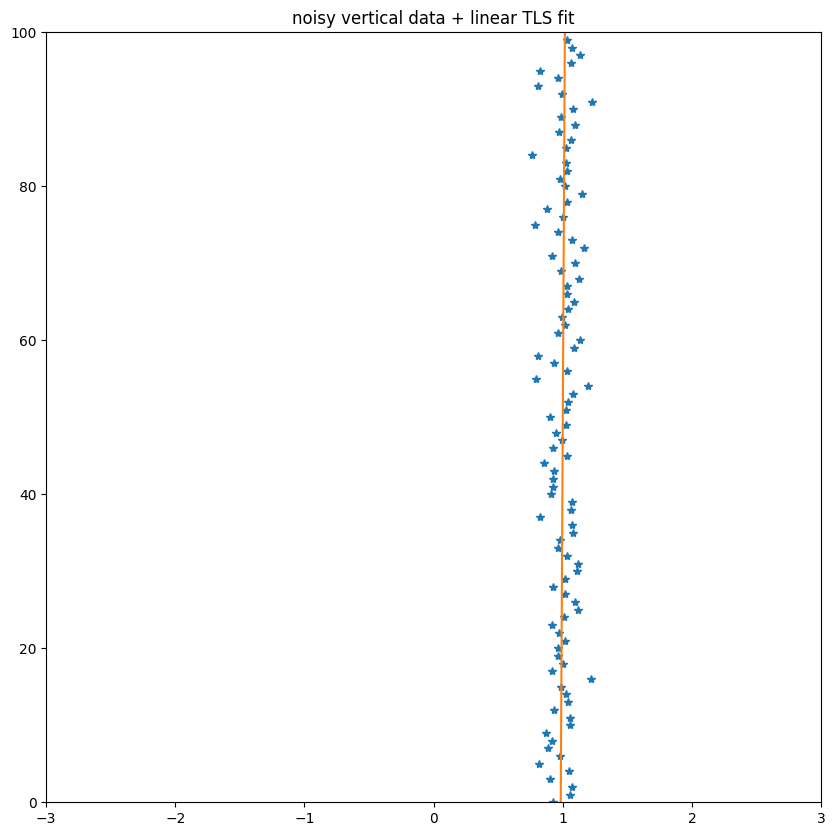

In [9]:
X = np.concatenate((x.reshape(-1, 1) - np.mean(x), y.reshape(-1, 1) - np.mean(y)), axis=1)


def linear_tls(X):
    w, v = np.linalg.eig(X.T @ X)
    return v[:, np.argmin(w)]


tls_res = linear_tls(X)

a = tls_res[0]
b = tls_res[1]

c = -a * np.mean(x) - b * np.mean(y)
x_fit = np.array([x.min(), x.max()])
y_fit = -a / b * x_fit - c / b

plt.figure(figsize=figsize)
plt.plot(x, y, "*")
plt.plot(x_fit, y_fit)
axes = plt.gca()
axes.set_xlim([-3, 3])
axes.set_ylim([0, 100])
plt.title("noisy vertical data + linear TLS fit")
plt.show()



## Example for non linear LS


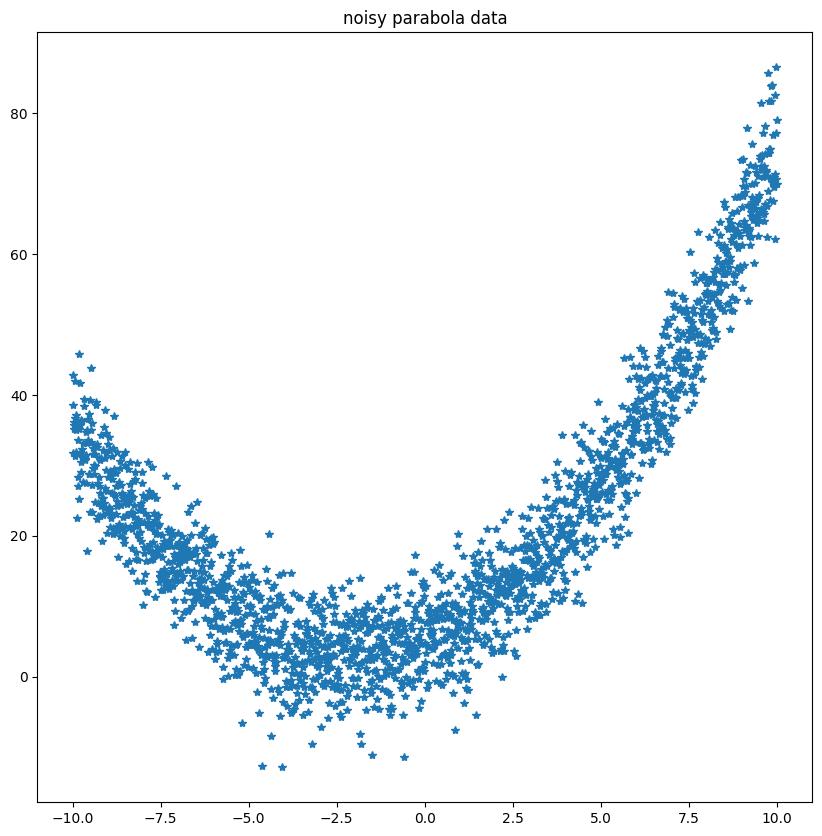

In [10]:
x_step = 0.01
x = np.arange(-10, 10 + x_step, x_step)

y = 0.5 * x ** 2 + 2 * x + 5

# add noise to data
std = 5
y = y + np.random.normal(scale=std, size=y.shape)

plt.figure(figsize=figsize)
plt.plot(x, y, "*")
plt.title("noisy parabola data")
plt.show()



In [11]:
# calc LS matrices
x_vec = x.reshape(-1, 1)
X = np.concatenate((x_vec ** 2, x_vec, np.ones(x_vec.shape)), axis=1)
y_vec = y.reshape(-1, 1)

b = np.linalg.lstsq(X, y_vec, rcond=None)[0]
print(b)


[[0.49962701]
 [1.99396636]
 [5.08918783]]


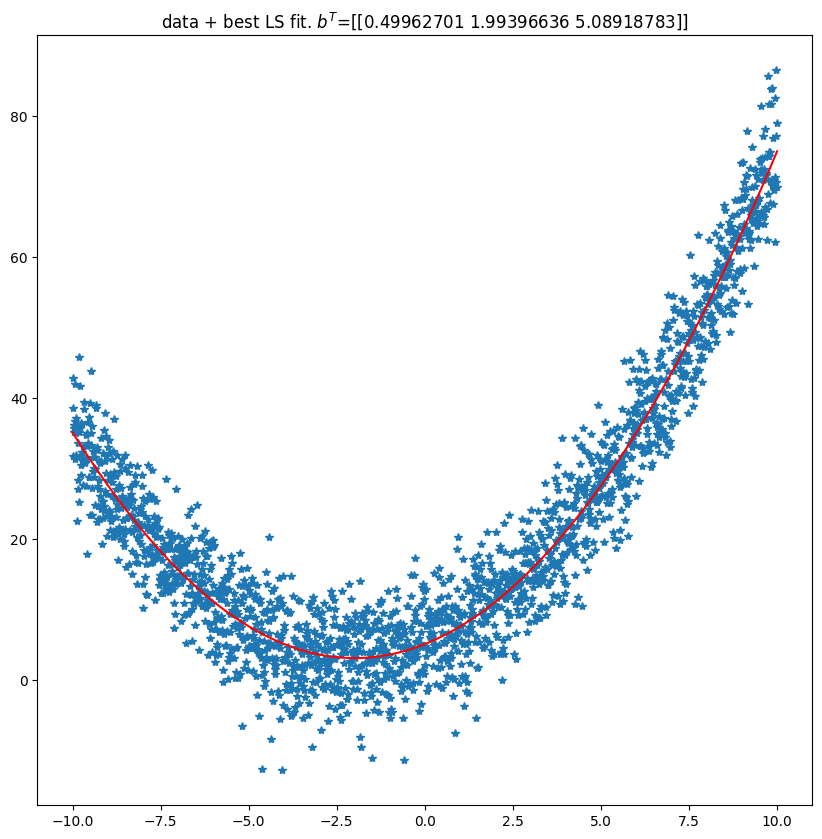

In [12]:
plt.figure(figsize=figsize)
plt.plot(x, y, "*")
plt.plot(x, b[0] * x ** 2 + b[1] * x + b[2], "r")
plt.title("data + best LS fit. $b^T$=" + str(b.T))
plt.show()



## Outliers
As mentioned, LS has a problem with outliers:


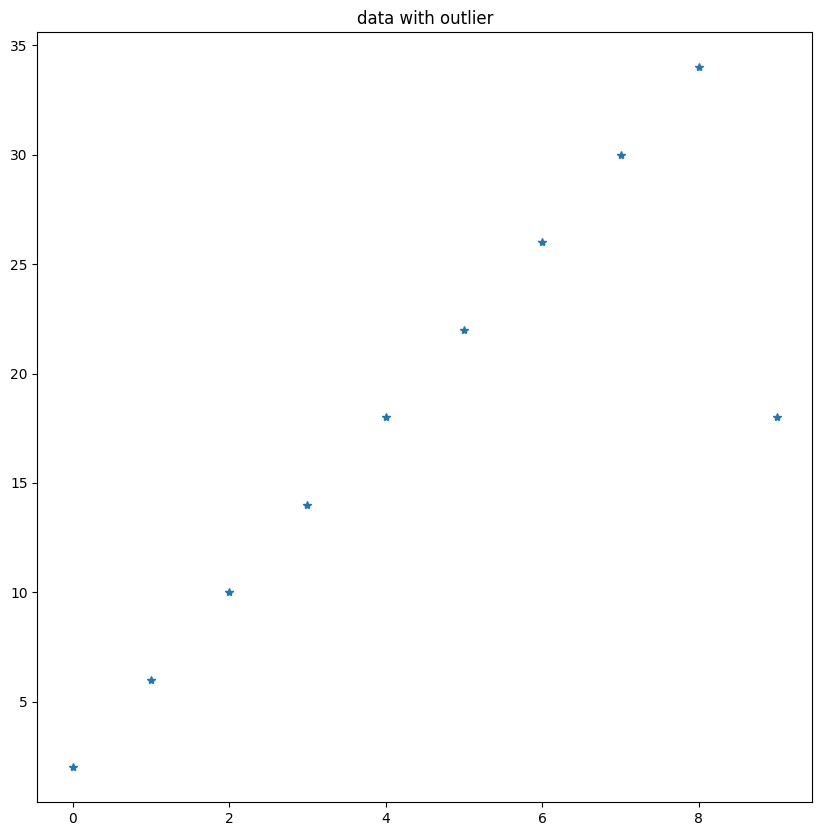

In [13]:
x_max = 10

x = np.arange(10)
y = 4 * x + 2

# let's change the last data point
y[-1] -= 20

plt.figure(figsize=figsize)
plt.plot(x, y, "*")
plt.title("data with outlier")
plt.show()



In [14]:
# calc LS matrices
x_vec = x.reshape(-1, 1)
X = np.concatenate((x_vec, np.ones(x_vec.shape)), axis=1)
y_vec = y.reshape(-1, 1)



[[2.90909091]
 [4.90909091]]


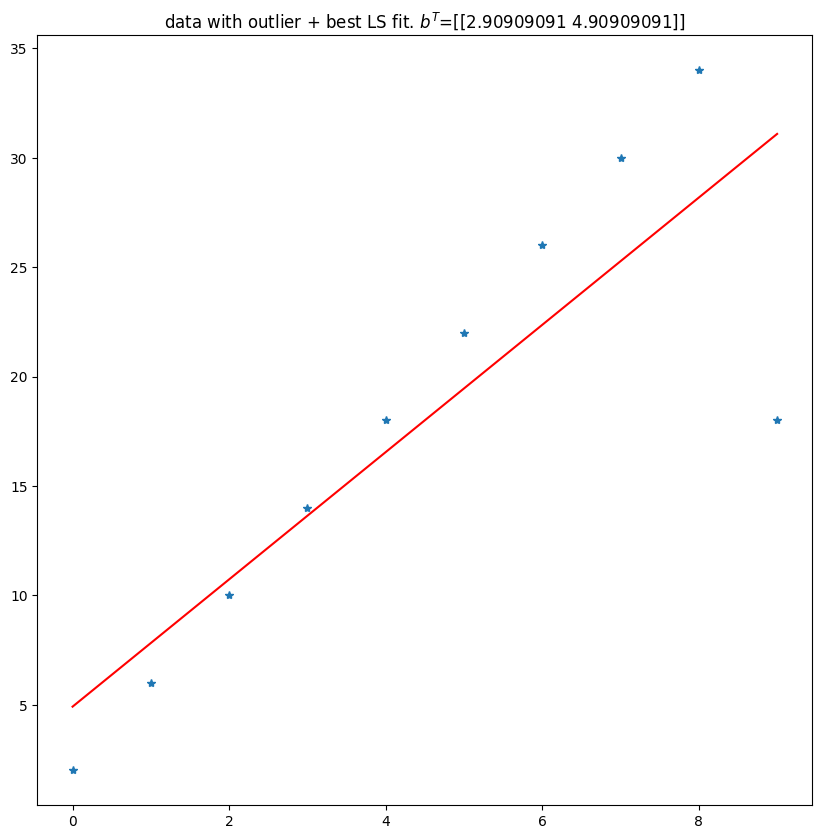

In [15]:
b = np.linalg.inv(X.T @ X) @ X.T @ y_vec
print(b)

# plot fit results
plt.figure(figsize=figsize)
plt.plot(x, y, "*")
x_axis = np.arange(x_max)
plt.plot(x_axis, b[0] * x_axis + b[1], "r")
plt.title("data with outlier + best LS fit. $b^T$=" + str(b.T))
plt.show()



## RANSAC
### arrange data


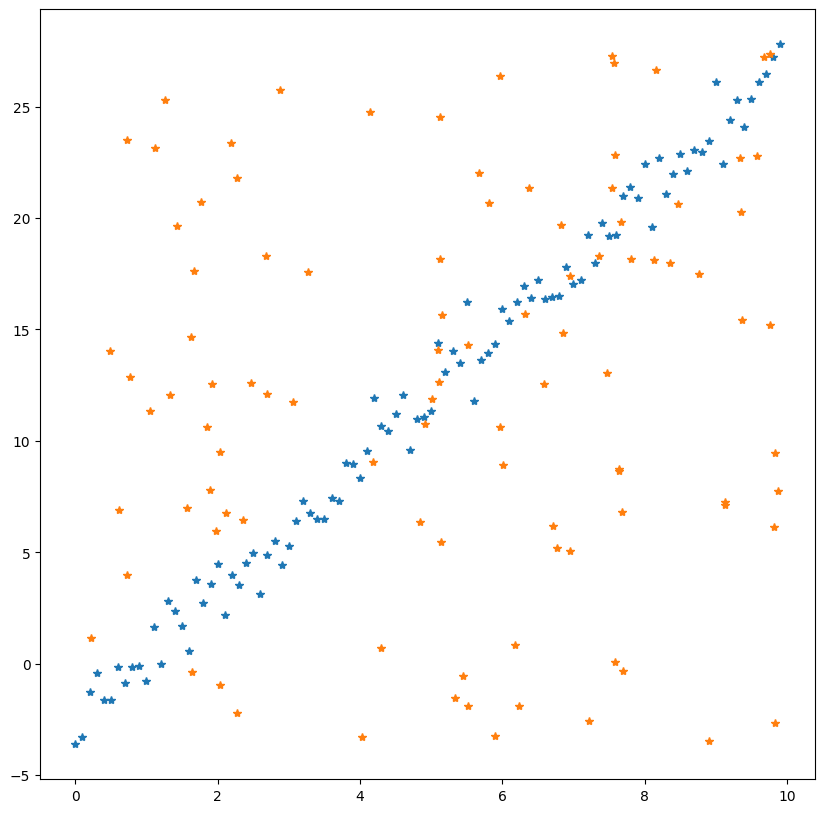

In [16]:

x = np.arange(0, 10, 0.1)
y = 3 * x - 3

# add noise to data
std = 1
y = y + np.random.normal(scale=std, size=x.shape)

# add random noise unrelated to noisy line
noise_sz = int(x.shape[0] * 1)
x_noise = np.random.uniform(x.min(), x.max(), size=noise_sz)
y_noise = np.random.uniform(y.min(), y.max(), size=noise_sz)

plt.figure(figsize=figsize)
plt.plot(x, y, "*")
plt.plot(x_noise, y_noise, "*")
plt.show()



In [17]:
x = np.concatenate((x, x_noise))
y = np.concatenate((y, y_noise))



### Run RANSAC


In [18]:


def basic_ransac(x, TH):
    # ====== choose 2 random inds
    rand_indices = np.random.choice(x.shape[0], size=2)

    # ====== build LS data:
    x_vec = x[rand_indices].reshape(-1, 1)
    X = np.concatenate((x_vec, np.ones(x_vec.shape)), axis=1)
    y_vec = y[rand_indices].reshape(-1, 1)

    b = np.linalg.lstsq(X, y_vec, rcond=None)[0].flatten()

    # ====== build fitted line
    line_p1 = np.array([x.min(), b[0] * x.min() + b[1]])
    line_p2 = np.array([x.max(), b[0] * x.max() + b[1]])
    inliers_ind = []

    # ====== distance of fit line from each sample to determine inliers
    for j in range(x.shape[0]):
        p_j = np.array([x[j], y[j]])

        # https://en.wikipedia.org/wiki/Cross_product#Geometric_meaning
        # |a X b| = |a||b|sin(t) -> |a X b|/|b| = |a|sin(t)
        d_j = np.linalg.norm(np.cross(line_p1 - p_j, line_p2 - line_p1)) / np.linalg.norm(line_p2 - line_p1)
        if d_j <= TH:
            inliers_ind.append(j)

    inliers_ind = np.array(inliers_ind)
    return b, inliers_ind




In [19]:
TH = 1
num_cycles = 10

num_best_inliers = 0
best_cycle_ind = -1
inliers_ind_list = []
b_list = []

for i in range(num_cycles):
    b, inliers_ind = basic_ransac(x, TH)
    inliers_ind_list.append(inliers_ind)
    b_list.append(b)

    # ====== save best model
    if num_best_inliers < inliers_ind.shape[0]:
        num_best_inliers = inliers_ind.shape[0]
        best_cycle_ind = i


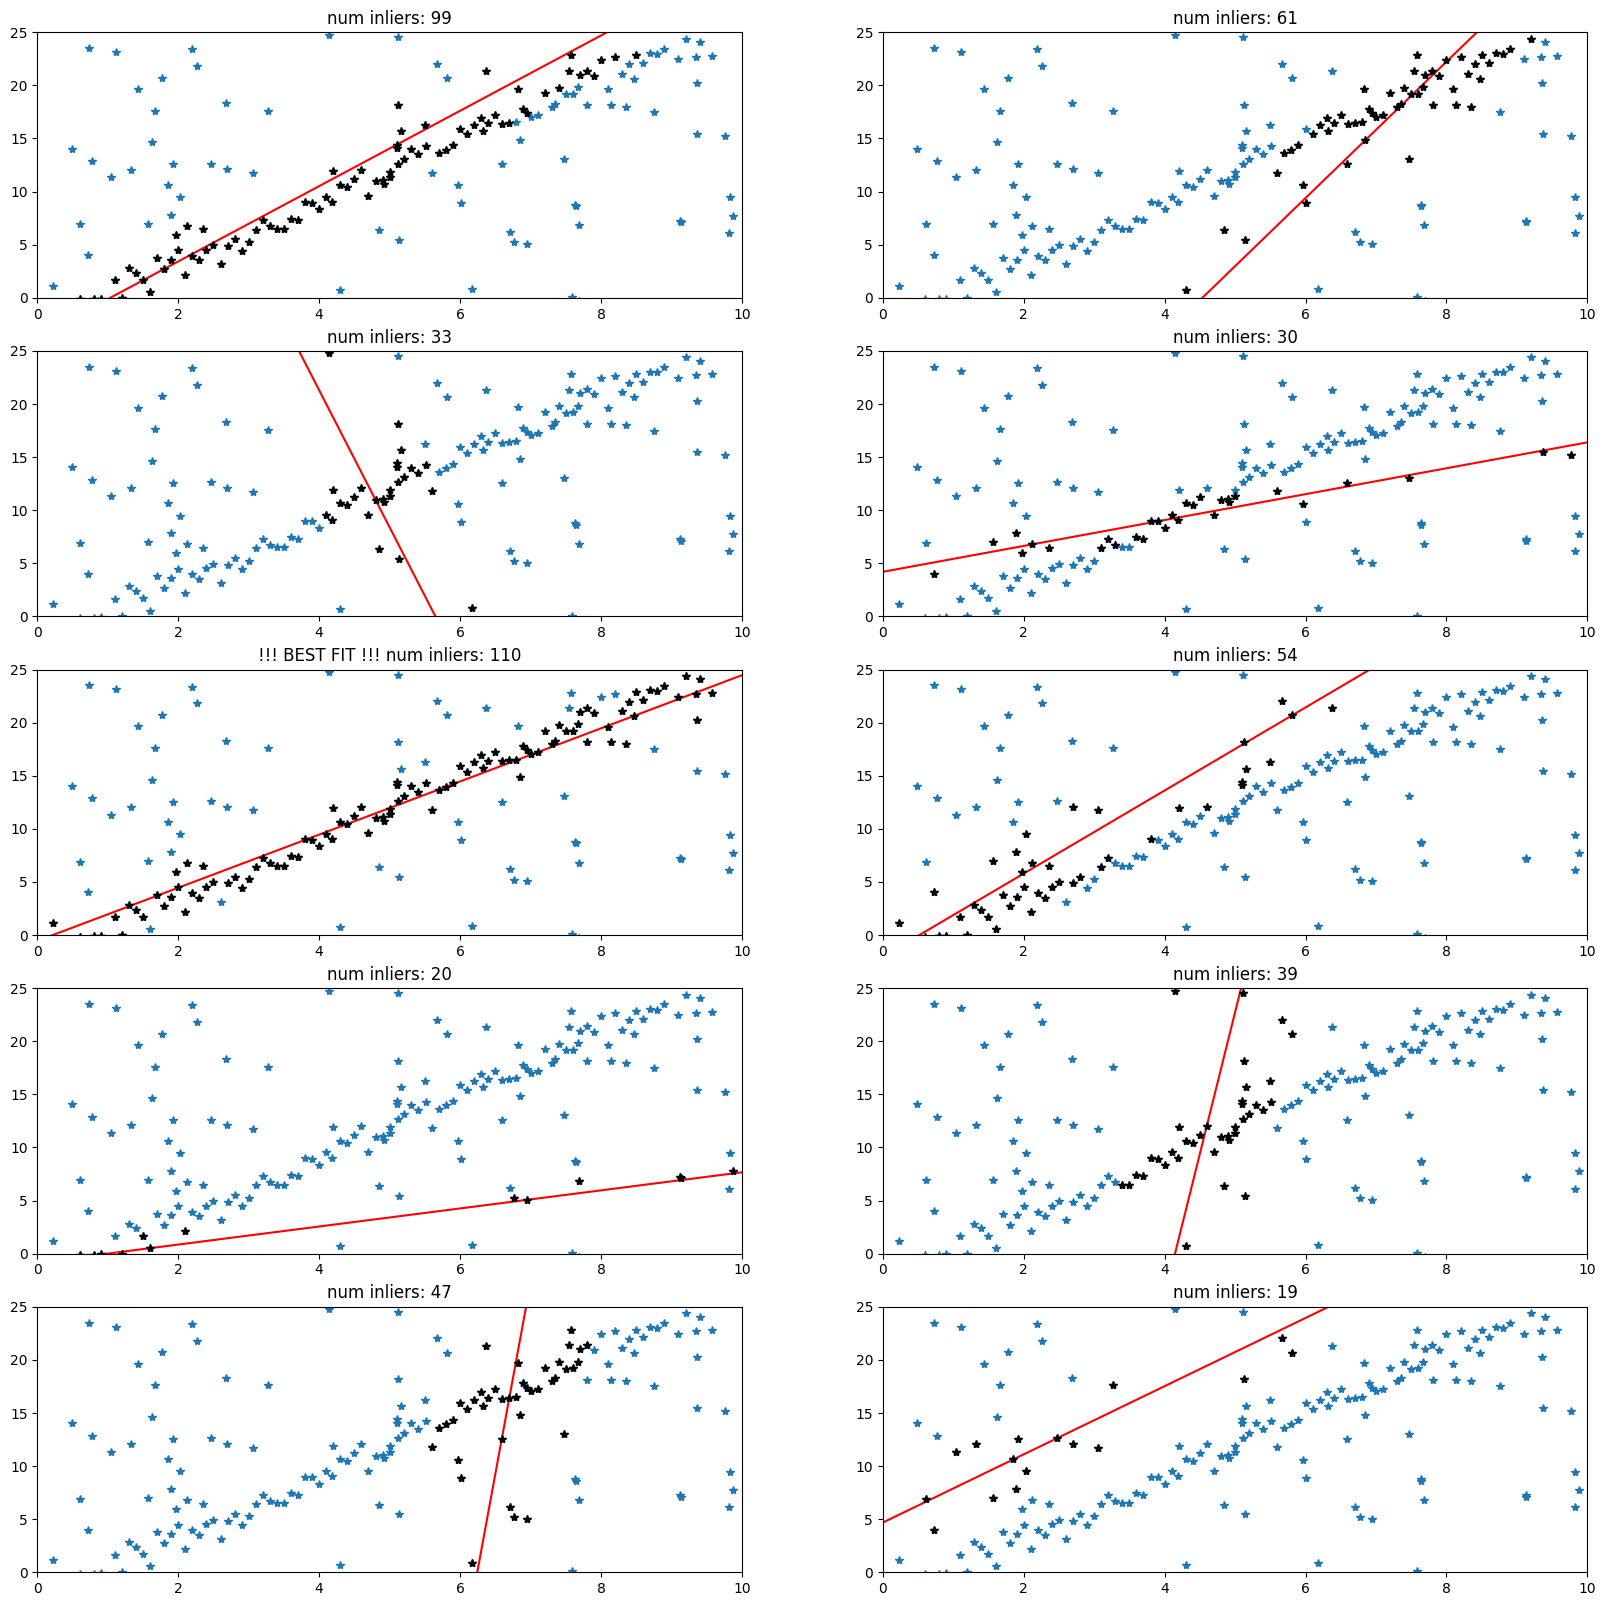

In [20]:
# plot best fit
plt.rcParams["figure.figsize"] = [20, 20]

for i in range(num_cycles):
    plt.subplot(int(num_cycles / 2), 2, i + 1)
    ax = plt.gca()
    x_axis = np.arange(11)
    ax.plot(x_axis, b_list[i][0] * x_axis + b_list[i][1], "r")
    ax.plot(x, y, "*")
    ax.plot(x[inliers_ind_list[i]], y[inliers_ind_list[i]], "*k")
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 25])
    if i == best_cycle_ind:
        plt.title("!!! BEST FIT !!! num inliers: " + str(inliers_ind_list[i].shape[0]))
    else:
        plt.title("num inliers: " + str(inliers_ind_list[i].shape[0]))
plt.show()



### Test RANSAC with sklearn package (a known machine learning package in python)
Code taken from: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html


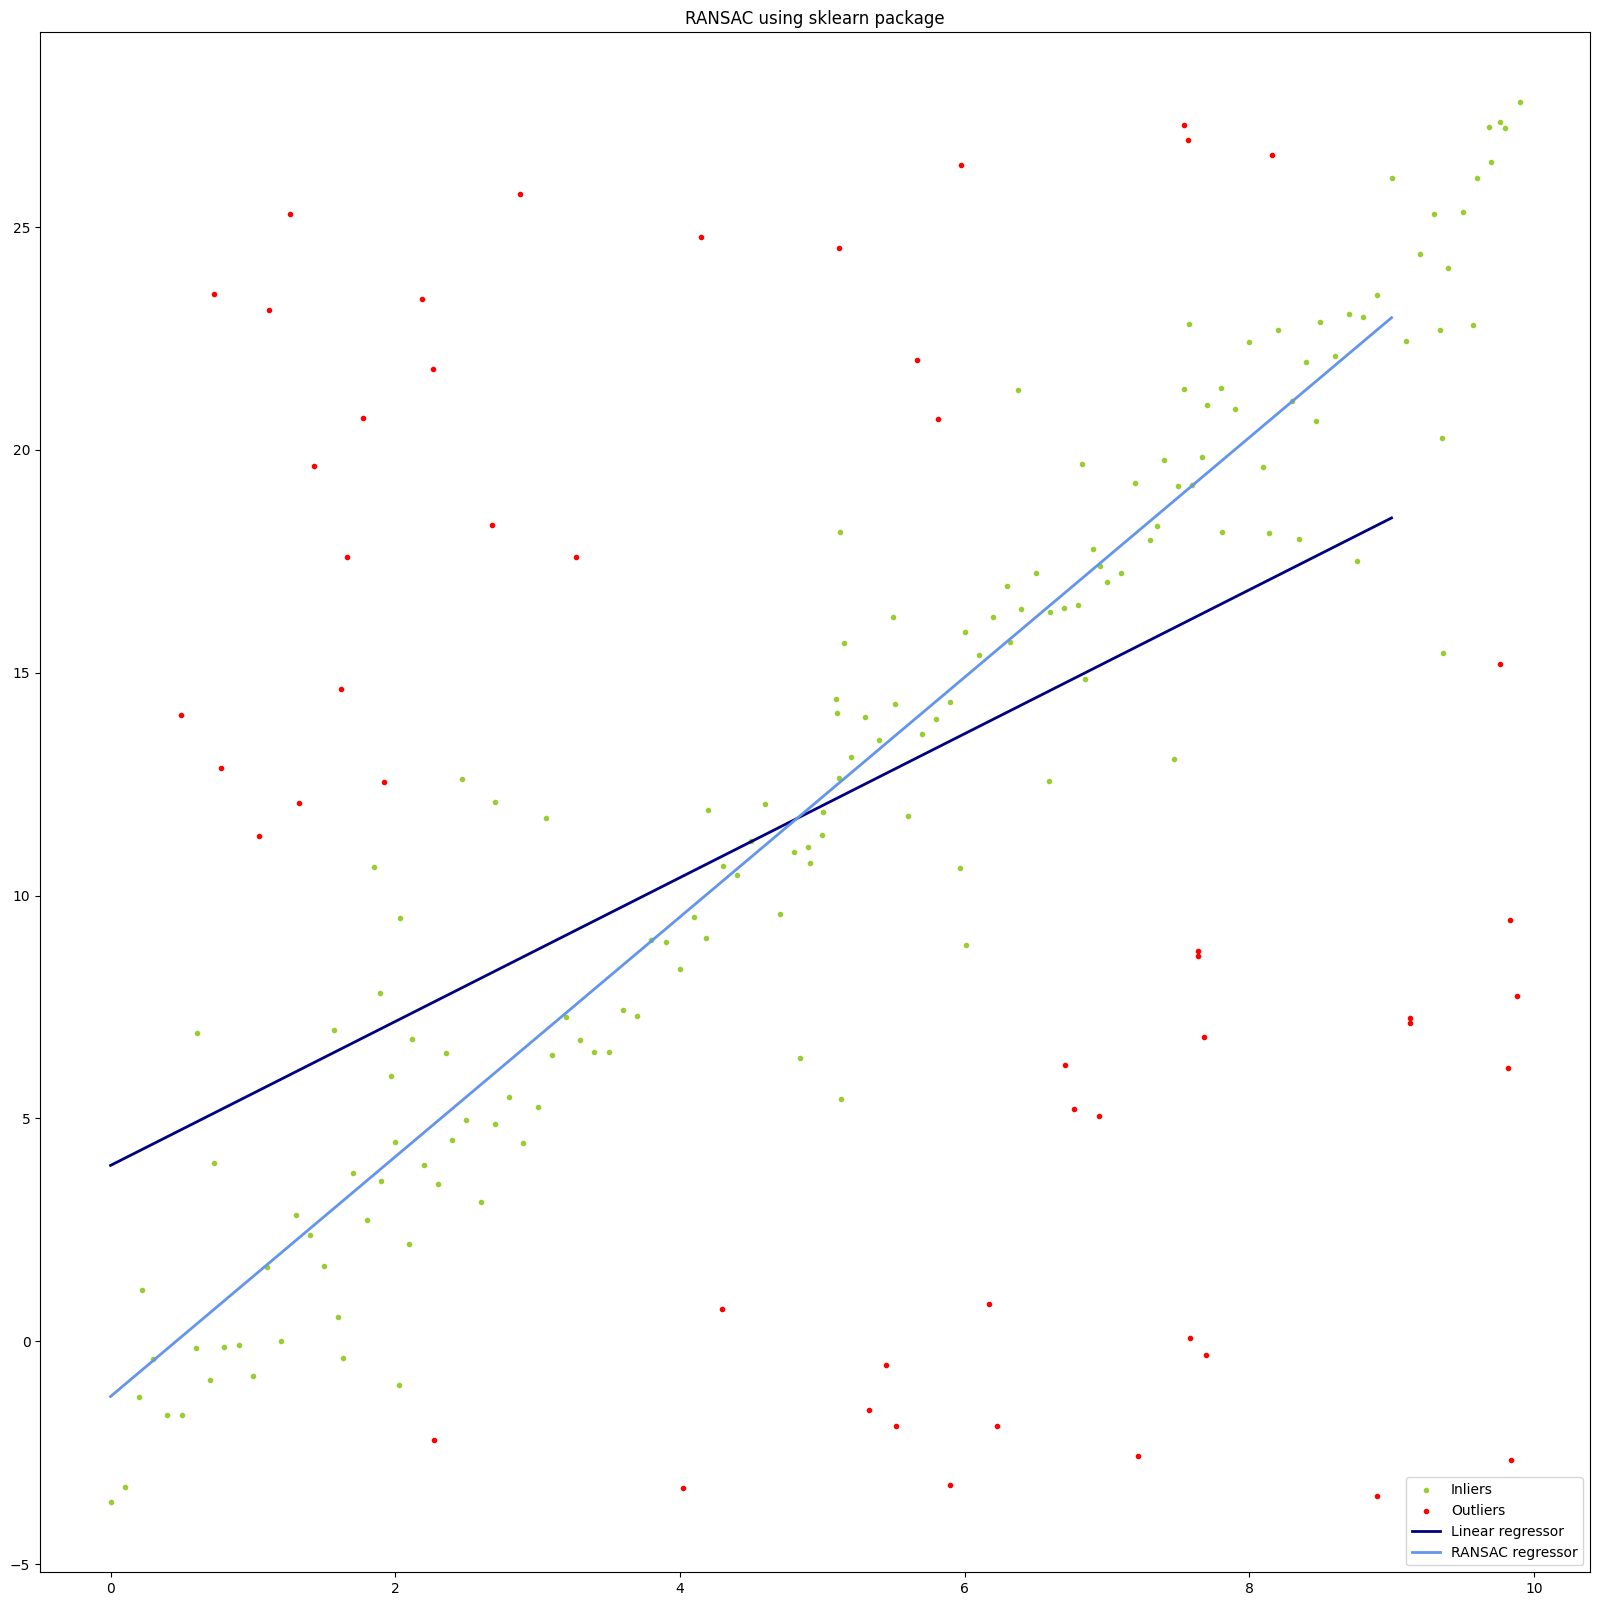

In [21]:
from sklearn import linear_model

X = x.reshape(-1, 1)


lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

plt.figure()
plt.scatter(X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], color="red", marker=".", label="Outliers")
plt.plot(line_X, line_y, color="navy", linewidth=2, label="Linear regressor")
plt.plot(line_X, line_y_ransac, color="cornflowerblue", linewidth=2, label="RANSAC regressor")
plt.legend(loc="lower right")
plt.title("RANSAC using sklearn package")
plt.show()
